Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6084)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       194,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195,195 (762.48 KB)

 Trainable params: 195,195 (762.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


987/987 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.1786 - loss: 2.2783 - val_accuracy: 0.2574 - val_loss: 2.1006
Epoch 2/3
987/987 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.2658 - loss: 2.0764 - val_accuracy: 0.2858 - val_loss: 2.0019
Epoch 3/3
987/987 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.3111 - loss: 1.9771 - val_accuracy: 0.2980 - val_loss: 1.9869
419/419 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1841 - loss: 2.1560
Test Accuracy: 32.24%


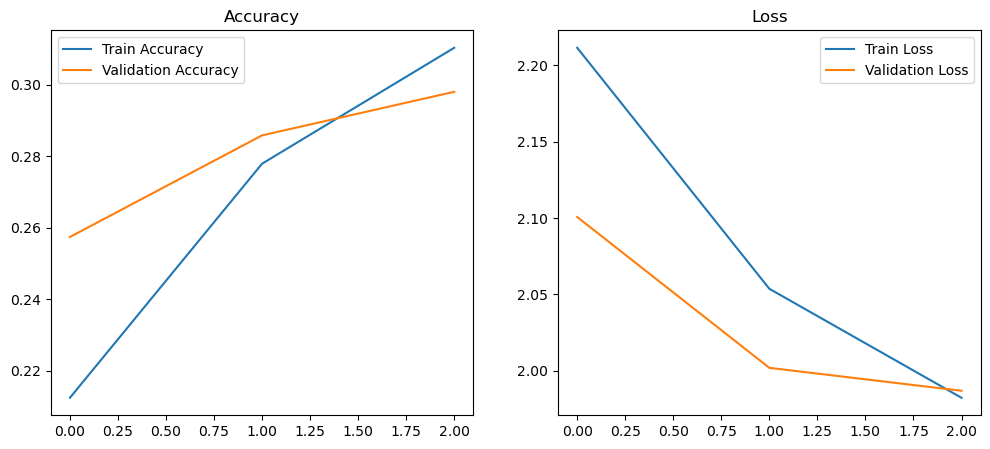

419/419 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

          Bread       0.19      0.05      0.08       368
  Dairy product       0.00      0.00      0.00       148
        Dessert       0.32      0.28      0.30       500
            Egg       0.31      0.09      0.14       335
     Fried food       0.26      0.26      0.26       287
           Meat       0.31      0.69      0.43       432
  Noodles-Pasta       0.50      0.02      0.04       147
           Rice       0.00      0.00      0.00        96
        Seafood       0.28      0.27      0.28       303
           Soup       0.32      0.59      0.42       500
Vegetable-Fruit       0.56      0.57      0.57       231

       accuracy                           0.32      3347
      macro avg       0.28      0.26      0.23      3347
   weighted avg       0.30      0.32      0.27      3347



Model saved as food11_light_model.h5
Model loaded successfully!


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Force TensorFlow to run on CPU only (if you're on a GPU system)
tf.config.set_visible_devices([], 'GPU')

# Set base directory (your structure is in 'jupyterwork/archive (3)')
base_dir = "./archive (3)"
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'evaluation')

# Smaller image size and batch size to prevent memory crash
img_height, img_width = 80, 80  # Lower image resolution
batch_size = 8  # Smaller batch size to reduce memory usage

# Use validation_split to split data and limit data for training/validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators with a validation split
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', 
    subset='training'  # Use only the training subset
)

val_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', 
    subset='validation'  # Use only the validation subset
)

test_data = val_test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=False
)

# Simplified CNN model to prevent kernel crash
model = models.Sequential([
    layers.Conv2D(4, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),  # Fewer filters
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3  # Reduced number of epochs for testing
)

# Evaluate the model
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Plot training & validation metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Classification report
y_pred = np.argmax(model.predict(test_data), axis=-1)
print("Classification Report:")
print(classification_report(test_data.classes, y_pred, target_names=list(test_data.class_indices.keys())))

# Save model
model.save("food11_light_model.h5")
print("Model saved as food11_light_model.h5")

# Load to test (optional)
loaded_model = load_model("food11_light_model.h5")
print("Model loaded successfully!")
